In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import os

In [2]:
# read the data
df = pd.read_csv("./Car_data/carsales.csv")

df.head(15)

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,5,2,?,audi,gas,std,two,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,6,1,158,audi,gas,std,four,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,7,1,?,audi,gas,std,four,wagon,fwd,front,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,8,1,158,audi,gas,turbo,four,sedan,fwd,front,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,9,0,?,audi,gas,turbo,two,hatchback,4wd,front,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [3]:
df.shape

(205, 27)

In [4]:
# clean the data by creating a new df or updating without "?"

# you can replace values with "?" with np.Nan
# data = df.replace("?", "np.Nan")

df = df[~(df == '?').any(axis=1)]
df.head(15)

/home/ubanna/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
6,6,1,158,audi,gas,std,four,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
8,8,1,158,audi,gas,turbo,four,sedan,fwd,front,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
10,10,2,192,bmw,gas,std,two,sedan,rwd,front,...,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430
11,11,0,192,bmw,gas,std,four,sedan,rwd,front,...,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16925
12,12,0,188,bmw,gas,std,two,sedan,rwd,front,...,164,mpfi,3.31,3.19,9.00,121,4250,21,28,20970
13,13,0,188,bmw,gas,std,four,sedan,rwd,front,...,164,mpfi,3.31,3.19,9.00,121,4250,21,28,21105
18,18,2,121,chevrolet,gas,std,two,hatchback,fwd,front,...,61,2bbl,2.91,3.03,9.50,48,5100,47,53,5151
19,19,1,98,chevrolet,gas,std,two,hatchback,fwd,front,...,90,2bbl,3.03,3.11,9.60,70,5400,38,43,6295


In [5]:
df.shape

(159, 27)

In [6]:
# reset the index, after updating dataframe

df = df.reset_index(drop=True)

df.head(10)

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
1,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
2,6,1,158,audi,gas,std,four,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
3,8,1,158,audi,gas,turbo,four,sedan,fwd,front,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
4,10,2,192,bmw,gas,std,two,sedan,rwd,front,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
5,11,0,192,bmw,gas,std,four,sedan,rwd,front,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925
6,12,0,188,bmw,gas,std,two,sedan,rwd,front,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
7,13,0,188,bmw,gas,std,four,sedan,rwd,front,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105
8,18,2,121,chevrolet,gas,std,two,hatchback,fwd,front,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151
9,19,1,98,chevrolet,gas,std,two,hatchback,fwd,front,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,6295


In [7]:
df.shape

(159, 27)

In [8]:
df.count()

Unnamed: 0           159
symboling            159
normalized-losses    159
make                 159
fuel-type            159
aspiration           159
num-of-doors         159
body-style           159
drive-wheels         159
engine-location      159
wheel-base           159
length               159
width                159
height               159
curb-weight          159
engine-type          159
num-of-cylinders     159
engine-size          159
fuel-system          159
bore                 159
stroke               159
compression-ratio    159
horsepower           159
peak-rpm             159
city-mpg             159
highway-mpg          159
price                159
dtype: int64

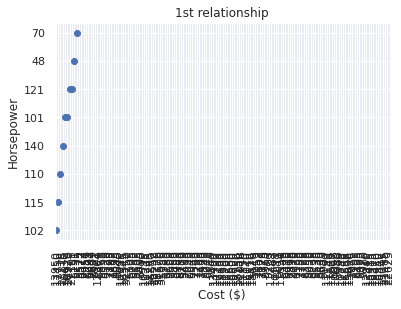

In [9]:
plt.title('1st relationship')

plt.scatter(df['price'].head(10), df['horsepower'].head(10))
plt.xticks(df['price'], rotation='vertical')
plt.xlabel('Cost ($)')
plt.ylabel('Horsepower')

#plt.legend()

plt.show()

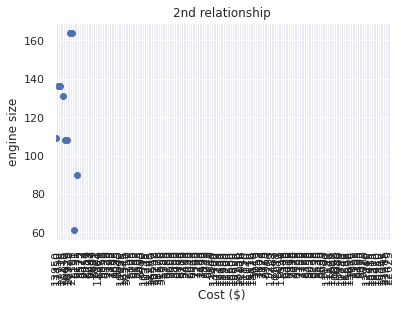

In [10]:
plt.title('2nd relationship')

plt.scatter(df['price'].head(10), df['engine-size'].head(10))
plt.xticks(df['price'], rotation='vertical')
plt.xlabel('Cost ($)')
plt.ylabel('engine size')

#plt.legend()

plt.show()

In [11]:
X = df[['horsepower', 'engine-size']]
y = df[['price']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [13]:
X_train.head()

,horsepower,engine-size
106,94,108
97,69,97
56,88,122
59,69,97
90,143,151


In [14]:
X_test.head()

,horsepower,engine-size
122,70,98
10,70,90
30,101,110
51,68,92
61,69,97


In [15]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [16]:
clf.predict(X_test)

array([[ 7548.56329393],
       [ 6507.50645469],
       [10707.07202993],
       [ 6664.7433434 ],
       [ 7366.91752848],
       [ 7548.56329393],
       [ 6355.66138008],
       [16164.5327148 ],
       [11479.77693822],
       [ 6404.47913359],
       [ 6355.66138008],
       [ 9468.04826962],
       [18959.74991988],
       [ 7426.51891016],
       [11699.31111566],
       [ 6534.61123849],
       [ 9934.36712164],
       [12602.14812886],
       [22573.64816637],
       [ 9197.00043163],
       [15589.79472758],
       [16164.5327148 ],
       [ 9004.42532464],
       [21478.38175953],
       [10086.21219625],
       [11805.03434381],
       [ 9468.04826962],
       [ 7548.56329393],
       [12602.14812886],
       [ 7548.56329393],
       [ 9197.00043163],
       [21735.9500623 ]])

In [17]:
print(y_test)

     price
122   8058
10    6575
30   12945
51    6669
61    6649
116   7198
109   5348
126   8449
53    9959
16    7609
113   7898
107   8013
18   12964
60    7099
79   15580
34    6095
29   10295
92   12170
73   13499
13    7957
43   18280
131  17669
98    7053
139  15690
102   9960
136  11248
103   9233
123   8238
91   11850
120   8358
85    7957
138  15998


In [18]:
print(clf.score(X_test, y_test))

0.2605563191361169
